# [Exercise 3](https://github.com/kokchun/Maskininlarning-AI21/blob/main/Exercises/E03_overfit_regularization.ipynb)

In [51]:
import pandas
import numpy
import seaborn
import matplotlib.pyplot as pyplot

In [3]:
tips_raw = seaborn.load_dataset('tips')
tips_raw.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 0

### a)

In [4]:
tips_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [7]:
tips_raw.describe().T.drop('count', axis='columns')

,mean,std,min,25%,50%,75%,max
total_bill,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [14]:
tips_dropped_unusable_columns = tips_raw[["total_bill", "tip", "size"]]
tips_dropped_unusable_columns

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
...,...,...,...
239,29.03,5.92,3
240,27.18,2.00,2
241,22.67,2.00,2
242,17.82,1.75,2


### b)

In [62]:
def plot_descriptive_data(ax, column_name, descriptive_data):
    seaborn.barplot(
        ax=ax, x=descriptive_data.index, y=descriptive_data.values
    ).set_title(f"Descriptive statistics: {column_name}")

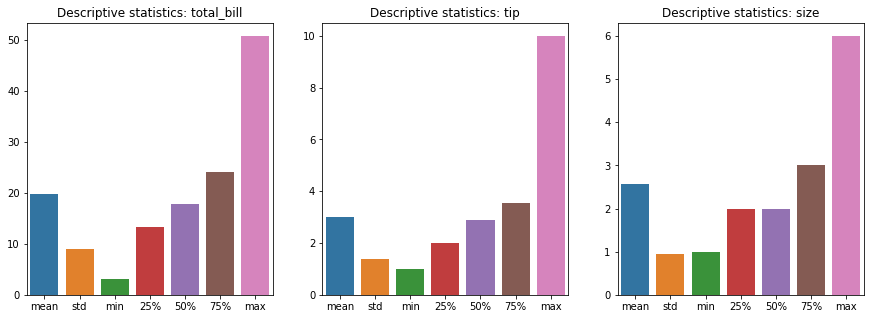

In [66]:
fig, axes = pyplot.subplots(1,3, figsize=(15,5))

for index, column in enumerate(tips_dropped_unusable_columns.columns):
    plot_descriptive_data(axes[index], column, tips_dropped_unusable_columns[column].describe().drop("count"))